In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas_datareader as pdr
import pandas_datareader.data as web
import bokeh
import hvplot.pandas
from bokeh.sampledata.penguins import data as df
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix

## Extracting data via web.DataReader

In [2]:
# Establish start and end date for analysis. Customizable.
start = datetime.datetime(2021,9,13)
end = datetime.datetime(2022,9,13)

# Extract first stock with pandas datareader method. Replace ticker name if you'd like. Excludes dividends/stock splits
amrc = web.DataReader("AMRC", "yahoo", start,end)
amrc

High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2021-09-13  70.379997  67.699997  70.379997  68.230003  333900  68.230003
2021-09-14  70.800003  68.970001  69.010002  70.300003  399800  70.300003
2021-09-15  70.580002  69.080002  70.000000  70.010002  476700  70.010002
2021-09-16  70.599998  65.589996  69.680000  65.599998  439400  65.599998
2021-09-17  67.669998  65.309998  66.169998  66.489998  868100  66.489998
...               ...        ...        ...        ...     ...        ...
2022-09-07  72.320000  65.860001  66.500000  72.160004  386000  72.160004
2022-09-08  74.669998  71.050003  71.379997  74.500000  375500  74.500000
2022-09-09  76.260002  74.339996  75.110001  74.739998  326600  74.739998
2022-09-12  74.980003  69.470001  74.480003  73.070000  379200  73.070000
2022-09-13  73.379997  69.010002  69.290001  72.330002  242200  72.330002

[253 rows x 6 columns]

In [3]:
# Amrc_close to be used later in moving averages table/plot

amrc_close = amrc[['Close']] # extract indicator of your choosing
amrc_close

Close
Date                 
2021-09-13  68.230003
2021-09-14  70.300003
2021-09-15  70.010002
2021-09-16  65.599998
2021-09-17  66.489998
...               ...
2022-09-07  72.160004
2022-09-08  74.500000
2022-09-09  74.739998
2022-09-12  73.070000
2022-09-13  72.330002

[253 rows x 1 columns]

In [4]:
# Extract second stock ith pandas datareader method
on = web.DataReader("ON", "yahoo", start,end)
on

High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2021-09-13  47.750000  46.580002  47.330002  47.639999  5018200  47.639999
2021-09-14  48.459999  47.270000  48.049999  47.849998  5553200  47.849998
2021-09-15  49.230000  47.570000  48.240002  49.209999  5534000  49.209999
2021-09-16  49.709999  48.380001  48.930000  49.400002  5785300  49.400002
2021-09-17  49.400002  48.090000  49.290001  48.889999  7268000  48.889999
...               ...        ...        ...        ...      ...        ...
2022-09-07  67.889999  65.639999  66.099998  67.360001  5836500  67.360001
2022-09-08  70.610001  66.389999  66.660004  70.550003  9769200  70.550003
2022-09-09  72.919998  71.019997  71.589996  71.669998  8264300  71.669998
2022-09-12  72.330002  70.669998  71.949997  71.900002  5592400  71.900002
2022-09-13  69.080002  66.570000  68.589996  66.870003  9889000  66.870003

[253 rows x 6 columns]

In [5]:
# On_close to be used later in moving averages table/plot

on_close = on[['Close']] # extract indicator of your choosing
on_close

Close
Date                 
2021-09-13  47.639999
2021-09-14  47.849998
2021-09-15  49.209999
2021-09-16  49.400002
2021-09-17  48.889999
...               ...
2022-09-07  67.360001
2022-09-08  70.550003
2022-09-09  71.669998
2022-09-12  71.900002
2022-09-13  66.870003

[253 rows x 1 columns]

In [6]:
# Extract third stock with pandas datareader method
stem = web.DataReader("STEM", "yahoo", start,end)
stem

High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2021-09-13  23.340000  22.250000  22.540001  22.920000  2683900  22.920000
2021-09-14  23.080000  22.155001  22.950001  22.360001  2031600  22.360001
2021-09-15  22.459999  21.740000  22.250000  22.360001  2374000  22.360001
2021-09-16  23.885000  22.045000  22.299999  23.740000  2398100  23.740000
2021-09-17  25.980000  24.090000  24.309999  25.940001  8552600  25.940001
...               ...        ...        ...        ...      ...        ...
2022-09-07  15.650000  14.290000  14.340000  15.630000  7655100  15.630000
2022-09-08  16.280001  15.130000  15.310000  16.160000  5694800  16.160000
2022-09-09  16.711000  16.010000  16.370001  16.400000  3959500  16.400000
2022-09-12  16.590000  15.630000  16.299999  16.559999  4214700  16.559999
2022-09-13  16.830000  15.180000  15.340000  16.350000  4173000  16.350000

[253 rows x 6 columns]

In [7]:
# Stem_close to be used later in moving averages table/plot

stem_close = on[['Close']] # extract indicator of your choosing
stem_close

Close
Date                 
2021-09-13  47.639999
2021-09-14  47.849998
2021-09-15  49.209999
2021-09-16  49.400002
2021-09-17  48.889999
...               ...
2022-09-07  67.360001
2022-09-08  70.550003
2022-09-09  71.669998
2022-09-12  71.900002
2022-09-13  66.870003

[253 rows x 1 columns]

## Extracting data via yf.Ticker module and history method

In [8]:
# Optional method of data extraction, this method includes dividends and stock splits
amrc_2 = yf.Ticker("amrc")
amrc_2

# Extract dates, set the interval
amrc_2 = amrc_2.history(start="2021-09-13", end="2022-09-13", interval="1d")
amrc_2.head()

Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2021-09-13  70.379997  70.379997  67.699997  68.230003  333900          0   
2021-09-14  69.010002  70.800003  68.970001  70.300003  399800          0   
2021-09-15  70.000000  70.580002  69.080002  70.010002  476700          0   
2021-09-16  69.680000  70.599998  65.589996  65.599998  439400          0   
2021-09-17  66.169998  67.669998  65.309998  66.489998  868100          0   

            Stock Splits  
Date                      
2021-09-13             0  
2021-09-14             0  
2021-09-15             0  
2021-09-16             0  
2021-09-17             0

In [9]:
on_2 = yf.Ticker("amrc")
on_2

# Extract dates, set the interval
on_2 = on_2.history(start="2021-09-13", end="2022-09-13", interval="1d")
on_2.head()

Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2021-09-13  70.379997  70.379997  67.699997  68.230003  333900          0   
2021-09-14  69.010002  70.800003  68.970001  70.300003  399800          0   
2021-09-15  70.000000  70.580002  69.080002  70.010002  476700          0   
2021-09-16  69.680000  70.599998  65.589996  65.599998  439400          0   
2021-09-17  66.169998  67.669998  65.309998  66.489998  868100          0   

            Stock Splits  
Date                      
2021-09-13             0  
2021-09-14             0  
2021-09-15             0  
2021-09-16             0  
2021-09-17             0

In [10]:
stem_2 = yf.Ticker("stem")
stem_2

# Extract dates, set the interval
stem_2 = stem_2.history(start="2021-09-13", end="2022-09-13", interval="1d")
stem_2.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2021-09-13  22.540001  23.340000  22.250000  22.920000  2683900          0   
2021-09-14  22.950001  23.080000  22.155001  22.360001  2031600          0   
2021-09-15  22.250000  22.459999  21.740000  22.360001  2374000          0   
2021-09-16  22.299999  23.885000  22.045000  23.740000  2398100          0   
2021-09-17  24.309999  25.980000  24.090000  25.940001  8552600          0   

            Stock Splits  
Date                      
2021-09-13             0  
2021-09-14             0  
2021-09-15             0  
2021-09-16             0  
2021-09-17             0

<AxesSubplot:xlabel='Date'>

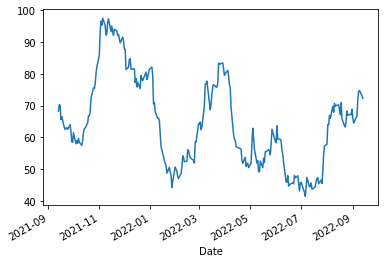

In [11]:
# test plotting feature on a stock dataframe

amrc['Close'].plot()




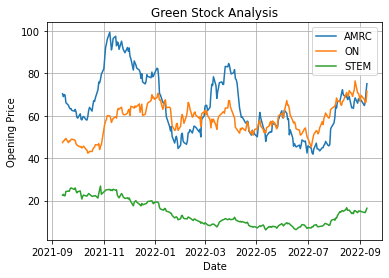

In [12]:
# Dataframe creation for each stock from csv format
amrc_df = pd.read_csv('AMRC.csv') 
on_df = pd.read_csv('ON.csv') 
stem_df= pd.read_csv('STEM.csv') 
 
# establish joint stock dataframe
stocks_df = pd.DataFrame()

# use date from amrc_df data to help establish joint df 'date' column
stocks_df['date'] = pd.to_datetime(amrc_df['Date'])

# create individual stock columns using data from 'Open' data only
stocks_df['AMRC'] = amrc_df['Open']
stocks_df['ON'] = on_df['Open']
stocks_df['STEM'] = stem_df['Open']

# plot open vs date
plt.plot(stocks_df['date'], stocks_df['AMRC'])
plt.plot(stocks_df['date'], stocks_df['ON'])
plt.plot(stocks_df['date'], stocks_df['STEM'])
 
# insert legends
plt.legend(labels=['AMRC','ON','STEM'])

# grid lines
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Green Stock Analysis')
plt.show() 

# one variable analysis (open), multiple categories (amrc, on, stem) - complex method
# also, plt.plot formatting with info inside parentheses (can't do figsize)

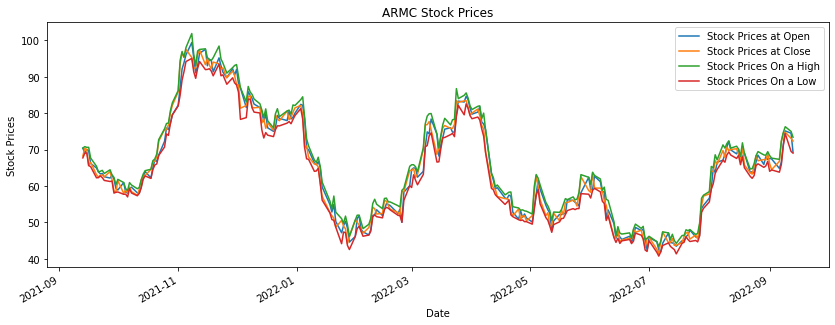

In [13]:
# compare open/close and high/low for AMRC (multi variable analysis)
amrc['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
amrc['Close'].plot(label= 'Stock Prices at Close')
amrc['High'].plot(label= 'Stock Prices On a High')
amrc['Low'].plot(label= 'Stock Prices On a Low')
# insert legend
plt.legend()

plt.title('ARMC Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

# multiple variables (open, close, high, low), one category (amrc)
# also, plot method with desired columns preceding 'plot' and labels inside.

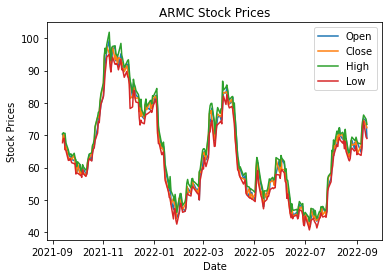

In [14]:
# secondary plotting method for amrc data. Shows prior method better b/c 'figsize' can be applied, whereas this does not allow
plt.plot(amrc['Open'])
plt.plot(amrc['Close'])
plt.plot(amrc['High'])
plt.plot(amrc['Low'])

# insert legend
plt.legend(labels=['Open','Close','High', 'Low'])

plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('ARMC Stock Prices')

plt.show()

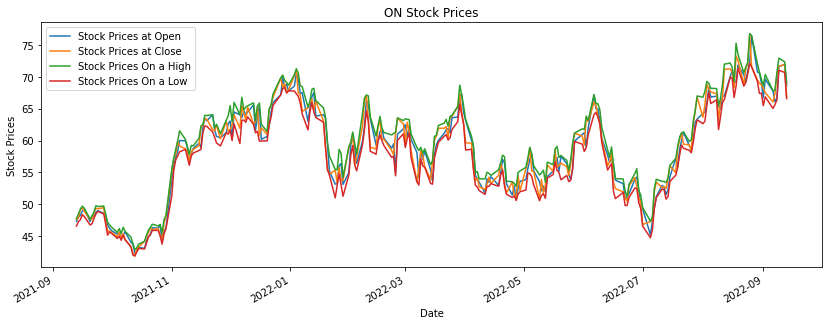

In [15]:
# compare open/close and high/low for ON (multi variable analysis)

on['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
on['Close'].plot(label= 'Stock Prices at Close')
on['High'].plot(label= 'Stock Prices On a High')
on['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('ON Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

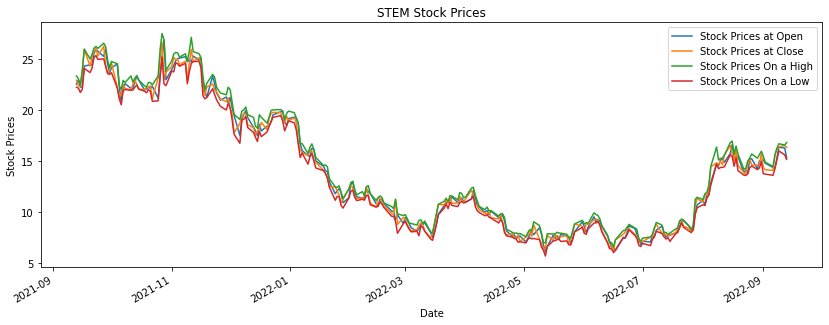

In [16]:
# compare open/close and high/low for STEM (multi variable analysis)

stem['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
stem['Close'].plot(label= 'Stock Prices at Close')
stem['High'].plot(label= 'Stock Prices On a High')
stem['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('STEM Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

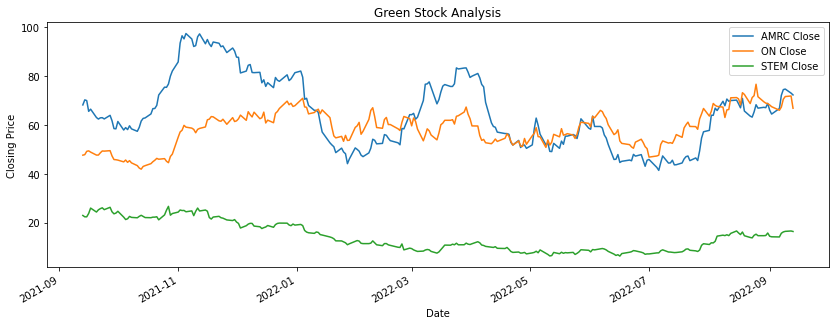

In [17]:
# one variable analysis (close), multiple categories (amrc, on, stem)
# also, column.plot formatting b/c info can be placed inside parentheses (e.g. figsize and labels)

amrc['Close'].plot(label= 'AMRC Close', figsize=(14,5))
on['Close'].plot(label= 'ON Close')
stem['Close'].plot(label= 'STEM Close')

# insert legend
plt.legend()

plt.title('Green Stock Analysis')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

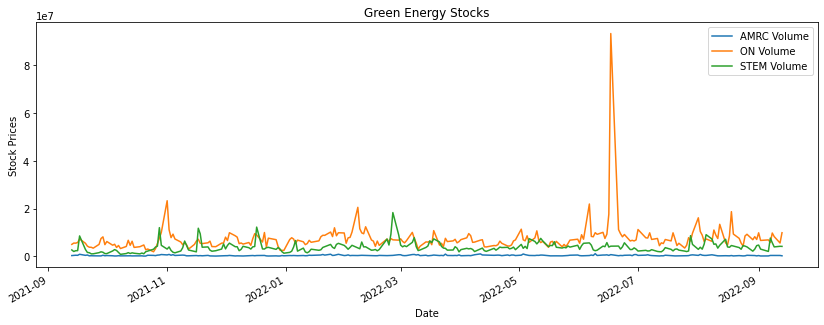

In [18]:
# Volume analysis for all three socks

amrc['Volume'].plot(label= 'AMRC Volume', figsize=(14,5))
on['Volume'].plot(label= 'ON Volume')
stem['Volume'].plot(label= 'STEM Volume')

# insert legend
plt.legend()

plt.title('Green Energy Stocks')
plt.ylabel('Stock Prices')
plt.xlabel('Date')
plt.show()

In [19]:
# if a stock with a high trading volume is rising, it means there is buying pressure, as investors demand pushes
# the stock to higher and higher prices. One the other hand, if the price of a stock with a high trading volume 
# is falling, it means more investors are selling their shares

In [20]:
# Multiplying opening price and each stocks' volume to get the total traded (money). This will be added as a column to each df
amrc['Total Traded'] = amrc['Open']*amrc['Volume']
on['Total Traded'] = on['Open']*amrc['Volume']
stem['Total Traded'] = stem['Open']*amrc['Volume']

In [21]:
# Test to see if a column is added to one of the stock's df table
stem.head()



High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2021-09-13  23.340000  22.250000  22.540001  22.920000  2683900  22.920000   
2021-09-14  23.080000  22.155001  22.950001  22.360001  2031600  22.360001   
2021-09-15  22.459999  21.740000  22.250000  22.360001  2374000  22.360001   
2021-09-16  23.885000  22.045000  22.299999  23.740000  2398100  23.740000   
2021-09-17  25.980000  24.090000  24.309999  25.940001  8552600  25.940001   

            Total Traded  
Date                      
2021-09-13  7.526106e+06  
2021-09-14  9.175410e+06  
2021-09-15  1.060658e+07  
2021-09-16  9.798620e+06  
2021-09-17  2.110351e+07

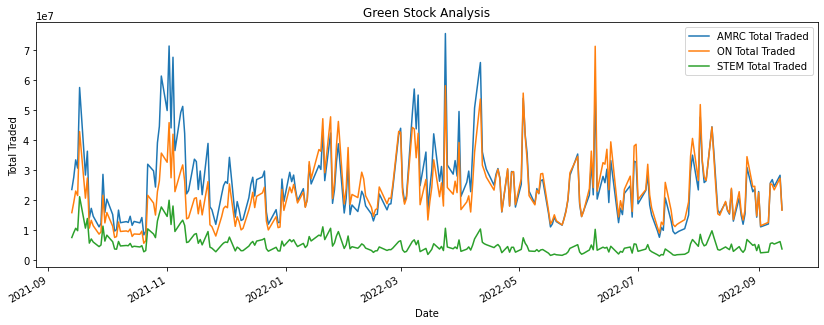

In [22]:

# Plot for total traded (money)

amrc['Total Traded'].plot(label='AMRC Total Traded', figsize =(14,5))
on['Total Traded'].plot(label='ON Total Traded')
stem['Total Traded'].plot(label='STEM Total Traded')

# insert legend
plt.legend()

plt.title('Green Stock Analysis')
plt.ylabel('Total Traded')
plt.xlabel('Date')
plt.show()

# time series graph shows that there is a large amt of TT for ON towards end of June 22; AMRC in 04/22; STEM in 11/21

In [23]:
# Argmax - domain of some function (TT = open x volume), index at which the function values are maximized 
# AMRC argmax

amrc['Total Traded'].argmax()



134

In [24]:
# ON argmax

on['Total Traded'].argmax()

187

In [25]:
# STEM argmax

stem['Total Traded'].argmax()

4

In [26]:
# Use iloc isolating index of argmax() data

amrc.iloc[[amrc['Total Traded'].argmax()]]



High    Low       Open      Close  Volume  Adj Close  \
Date                                                                    
2022-03-24  86.730003  79.25  79.480003  83.410004  948700  83.410004   

            Total Traded  
Date                      
2022-03-24  7.540268e+07

## Moving Averages
##### MA are indicators used as a technique for trading by filtering out short-term price fluctuations by taking the average price. It indicates trend direction and determines resistance levels. 
##### Trading signal: when asset prices crosses over (is greater)  the MA. Therefore, MA are a popular strategy for entries/exits

In [27]:
# Tabular format of moving averages
# dates established from amrc_close datafraeme

short_window = 50
long_window = 100

# Calculation of each moving average
amrc_close['SMA50'] = amrc_close['Close'].rolling(window=short_window).mean()
amrc_close['SMA100'] = amrc_close['Close'].rolling(window=long_window).mean()
amrc_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

amrc_close['Trading Signal'][short_window:] = np.where(
   amrc_close['SMA50'][short_window:] > amrc_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
amrc_close['Entry/Exit'] = amrc_close['Trading Signal'].diff()
amrc_close.tail(10)

amrc_close.tail(15)

/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3889525145.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amrc_close['SMA50'] = amrc_close['Close'].rolling(window=short_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3889525145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amrc_close['SMA100'] = amrc_close['Close'].rolling(window=long_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3889525145.py:10: SettingWithCopyWa

Close      SMA50   SMA100  Trading Signal  Entry/Exit
Date                                                                 
2022-08-23  63.230000  53.214000  55.8950             0.0         0.0
2022-08-24  65.379997  53.604200  55.7538             0.0         0.0
2022-08-25  68.309998  54.051200  55.6367             0.0         0.0
2022-08-26  66.910004  54.431800  55.4945             0.0         0.0
2022-08-29  67.250000  54.884000  55.3735             0.0         0.0
2022-08-30  67.110001  55.323801  55.2783             1.0         1.0
2022-08-31  68.849998  55.788200  55.2104             1.0         0.0
2022-09-01  66.080002  56.203000  55.1784             1.0         0.0
2022-09-02  64.480003  56.533401  55.2142             1.0         0.0
2022-09-06  66.739998  56.923400  55.2875             1.0         0.0
2022-09-07  72.160004  57.409401  55.4184             1.0         0.0
2022-09-08  74.500000  57.990001  55.5926             1.0         0.0
2022-09-09  74.739998  58.623000  55.7750             1.0         0.0
2022-09-12  73.070000  59.173200  55.9409             1.0         0.0
2022-09-13  72.330002  59.702401  56.1021             1.0         0.0

In [28]:
# ON

short_window = 50
long_window = 100

# Calculation of each moving average
on_close['SMA50'] = on_close['Close'].rolling(window=short_window).mean()
on_close['SMA100'] = on_close['Close'].rolling(window=long_window).mean()
on_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

on_close['Trading Signal'][short_window:] = np.where(
   on_close['SMA50'][short_window:] > on_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
on_close['Entry/Exit'] = on_close['Trading Signal'].diff()
on_close


/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/1730889781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_close['SMA50'] = on_close['Close'].rolling(window=short_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/1730889781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_close['SMA100'] = on_close['Close'].rolling(window=long_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/1730889781.py:9: SettingWithCopyWarning: 
A

Close    SMA50   SMA100  Trading Signal  Entry/Exit
Date                                                               
2021-09-13  47.639999      NaN      NaN             0.0         NaN
2021-09-14  47.849998      NaN      NaN             0.0         0.0
2021-09-15  49.209999      NaN      NaN             0.0         0.0
2021-09-16  49.400002      NaN      NaN             0.0         0.0
2021-09-17  48.889999      NaN      NaN             0.0         0.0
...               ...      ...      ...             ...         ...
2022-09-07  67.360001  62.7196  59.4124             1.0         0.0
2022-09-08  70.550003  63.0744  59.5853             1.0         0.0
2022-09-09  71.669998  63.4854  59.7563             1.0         0.0
2022-09-12  71.900002  63.9172  59.9115             1.0         0.0
2022-09-13  66.870003  64.3178  60.0262             1.0         0.0

[253 rows x 5 columns]

In [29]:
# STEM

short_window = 50
long_window = 100

# Calculation of each moving average
stem_close['SMA50'] = amrc_close['Close'].rolling(window=short_window).mean()
stem_close['SMA100'] = amrc_close['Close'].rolling(window=long_window).mean()
stem_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

stem_close['Trading Signal'][short_window:] = np.where(
   stem_close['SMA50'][short_window:] > stem_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
stem_close['Entry/Exit'] = stem_close['Trading Signal'].diff()
stem_close.tail(10)

/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3985838402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stem_close['SMA50'] = amrc_close['Close'].rolling(window=short_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3985838402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stem_close['SMA100'] = amrc_close['Close'].rolling(window=long_window).mean()
/var/folders/s8/7__gkhq15530tygbs3rs01xm0000gn/T/ipykernel_60653/3985838402.py:9: SettingWithCopyWar

Close      SMA50   SMA100  Trading Signal  Entry/Exit
Date                                                                 
2022-08-30  68.970001  55.323801  55.2783             1.0         1.0
2022-08-31  68.769997  55.788200  55.2104             1.0         0.0
2022-09-01  68.220001  56.203000  55.1784             1.0         0.0
2022-09-02  67.510002  56.533401  55.2142             1.0         0.0
2022-09-06  66.050003  56.923400  55.2875             1.0         0.0
2022-09-07  67.360001  57.409401  55.4184             1.0         0.0
2022-09-08  70.550003  57.990001  55.5926             1.0         0.0
2022-09-09  71.669998  58.623000  55.7750             1.0         0.0
2022-09-12  71.900002  59.173200  55.9409             1.0         0.0
2022-09-13  66.870003  59.702401  56.1021             1.0         0.0

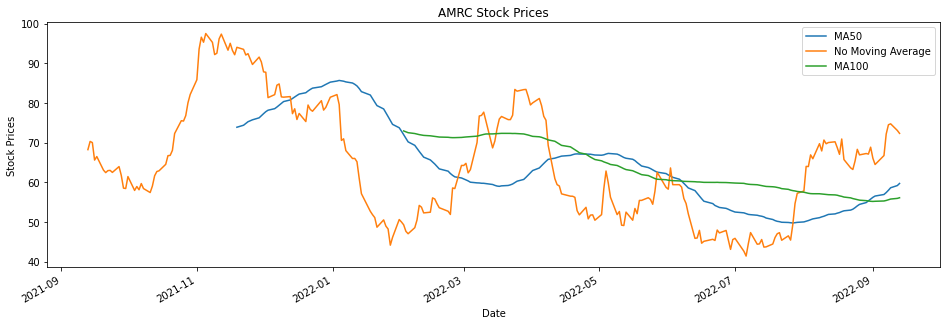

In [30]:
# Smooth out the date with moving average of 50 and 100 on AMRC stock (means)

# new column 'MA60' with formula following '='; plotting new column in graph
amrc['MA50'] = amrc['Close'].rolling(50).mean()
amrc['MA50'].plot(label='MA50')

# plotting AMRC 'Close' as 'No Moving Average'
amrc['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
amrc['MA100'] = amrc['Close'].rolling(100).mean()
amrc['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('AMRC Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')

plt.show()

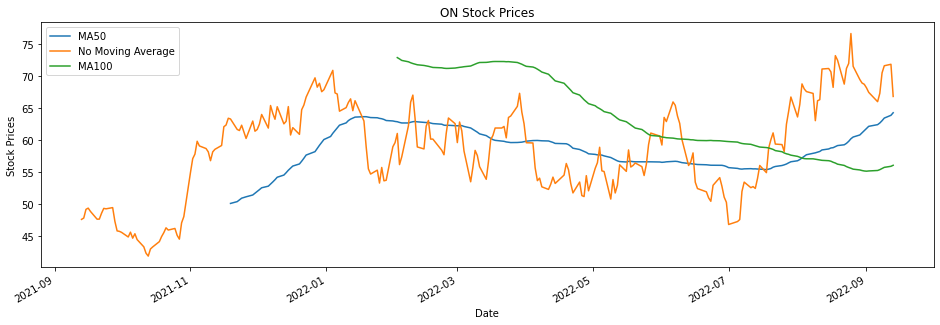

In [31]:
# new column 'MA60' with formula following '='; plotting new column in graph
on['MA50'] = on['Close'].rolling(50).mean()
on['MA50'].plot(label='MA50')

# plotting AMRC 'Close' as 'No Moving Average'
on['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
on['MA100'] = amrc['Close'].rolling(100).mean()
on['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('ON Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

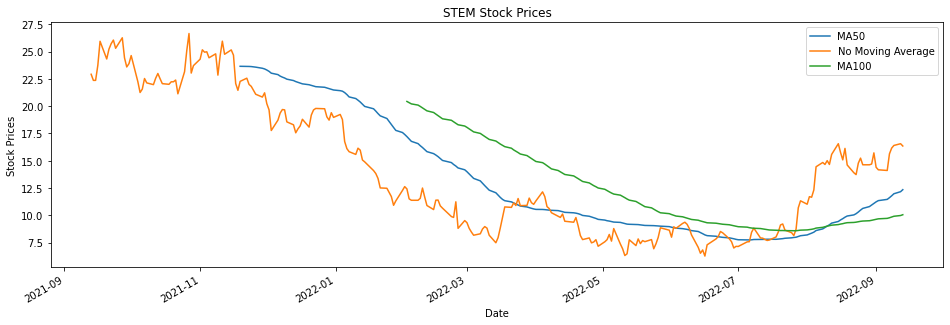

In [56]:
# new column 'MA60' with formula following '='; plotting new column in graph
stem['MA50'] = stem['Close'].rolling(50).mean()
stem['MA50'].plot(label='MA50')

# plotting AMRC 'Close' as 'No Moving Average'
stem['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
on['MA100'] = stem['Close'].rolling(100).mean()
on['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('STEM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

## Moving Average Visualization with HVPlot package

In [62]:
# exit position relative to close price

exit = amrc_close[amrc_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = amrc_close[amrc_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
   width=1000,
    height=550
)
# Visualize close price for the investment
security_close = amrc_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
   height=550
)
# Visualize moving averages
moving_avgs = amrc_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [63]:
#  exit position relative to close price

exit = on_close[on_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = on_close[on_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
   width=1000,
    height=550
)
# Visualize close price for the investment
security_close = on_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
   height=550
)
# Visualize moving averages
moving_avgs = on_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [65]:
# exit position relative to close price

exit = stem_close[stem_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = stem_close[stem_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
   width=1000,
    height=550
)
# Visualize close price for the investment
security_close = stem_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
   height=550
)
# Visualize moving averages
moving_avgs = stem_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [71]:
# Portfolio example with random number of shares of AMRC

# Set initial capital
initial_capital = float(100000)
# Set the share size
share_size = 500
# Take a 500 share position where the dual moving average crossover is 1 (SMA50 >SMA100)
amrc_close['Position'] = share_size * amrc_close['Trading Signal']

# Find the points in time where a 500 share position is bought or sold
amrc_close['Entry/Exit Position'] = amrc_close['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
amrc_close['Portfolio Holdings'] = amrc_close['Close'] * amrc_close['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
amrc_close['Portfolio Cash'] = initial_capital - (amrc_close['Close'] * amrc_close['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
amrc_close['Portfolio Total'] = amrc_close['Portfolio Cash'] + amrc_close['Portfolio Holdings']

# Calculate the portfolio daily returns
amrc_close['Portfolio Daily Percentage Return'] = amrc_close['Portfolio Total'].pct_change()

# Calculate the cumulative returns
amrc_close['Portfolio Cumulative Return'] = (1 + amrc_close['Portfolio Daily Percentage Return']).cumprod() - 1

# Print the DataFrame
amrc_close.tail(10)


Close      SMA50   SMA100  Trading Signal  Entry/Exit  \
Date                                                                    
2022-08-30  67.110001  55.323801  55.2783             1.0         1.0   
2022-08-31  68.849998  55.788200  55.2104             1.0         0.0   
2022-09-01  66.080002  56.203000  55.1784             1.0         0.0   
2022-09-02  64.480003  56.533401  55.2142             1.0         0.0   
2022-09-06  66.739998  56.923400  55.2875             1.0         0.0   
2022-09-07  72.160004  57.409401  55.4184             1.0         0.0   
2022-09-08  74.500000  57.990001  55.5926             1.0         0.0   
2022-09-09  74.739998  58.623000  55.7750             1.0         0.0   
2022-09-12  73.070000  59.173200  55.9409             1.0         0.0   
2022-09-13  72.330002  59.702401  56.1021             1.0         0.0   

            Position  Entry/Exit Position  Portfolio Holdings  Portfolio Cash  \
Date                                                                            
2022-08-30     500.0                500.0        33555.000305    67559.999466   
2022-08-31     500.0                  0.0        34424.999237    67559.999466   
2022-09-01     500.0                  0.0        33040.000916    67559.999466   
2022-09-02     500.0                  0.0        32240.001678    67559.999466   
2022-09-06     500.0                  0.0        33369.998932    67559.999466   
2022-09-07     500.0                  0.0        36080.001831    67559.999466   
2022-09-08     500.0                  0.0        37250.000000    67559.999466   
2022-09-09     500.0                  0.0        37369.998932    67559.999466   
2022-09-12     500.0                  0.0        36534.999847    67559.999466   
2022-09-13     500.0                  0.0        36165.000916    67559.999466   

            Portfolio Total  Portfolio Daily Percentage Return  \
Date                                                             
2022-08-30    101114.999771                           0.000000   
2022-08-31    101984.998703                           0.008604   
2022-09-01    100600.000381                          -0.013580   
2022-09-02     99800.001144                          -0.007952   
2022-09-06    100929.998398                           0.011323   
2022-09-07    103640.001297                           0.026850   
2022-09-08    104809.999466                           0.011289   
2022-09-09    104929.998398                           0.001145   
2022-09-12    104094.999313                          -0.007958   
2022-09-13    103725.000381                          -0.003554   

            Portfolio Cumulative Return  
Date                                     
2022-08-30                      0.01115  
2022-08-31                      0.01985  
2022-09-01                      0.00600  
2022-09-02                     -0.00200  
2022-09-06                      0.00930  
2022-09-07                      0.03640  
2022-09-08                      0.04810  
2022-09-09                      0.04930  
2022-09-12                      0.04095  
2022-09-13                      0.03725

In [72]:
# visualize exit positions relative to portfolio (not close price, this is more specific to what you have)

exit = amrc_close[amrc_close['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Visualize entry position relative to total portfolio value
entry = amrc_close[amrc_close['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Visualize total portoflio value for the investment
total_portfolio_value = amrc_close[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [75]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']
columns = ['Backtest']
# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df


Backtest
Annual Return           NaN
Cumulative Returns      NaN
Annual Volatility       NaN
Sharpe Ratio            NaN
Sortino Ratio           NaN

In [87]:
# Calculate cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = amrc_close['Portfolio Cumulative Return'][-1]
# Calculate annualized return
portfolio_evaluation_df.loc['Annual Return'] = (
    amrc_close['Portfolio Daily Percentage Return'].mean() * 252
)
# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    amrc_close['Portfolio Daily Percentage Return'].std() * np.sqrt(252)
)
# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    amrc_close['Portfolio Daily Percentage Return'].mean() * 252) / (
    amrc_close['Portfolio Daily Percentage Return'].std() * np.sqrt(252)
)
# Calculate Downside Return
sortino_ratio_df = amrc_close[['Portfolio Daily Percentage Return']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0
target = 0
mask = sortino_ratio_df['Portfolio Daily Percentage Return'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Percentage Return']**2
portfolio_evaluation_df
# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Portfolio Daily Percentage Return'].mean() * 252
sortino_ratio = expected_return/down_stdev
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
portfolio_evaluation_df.head()

Backtest
Annual Return       0.040726
Cumulative Returns   0.03725
Annual Volatility   0.089908
Sharpe Ratio        0.452972
Sortino Ratio       0.744821

## Correlation and scatter matrix

In [33]:
# Create combined stock dataframe for scatter matrix on 'Open' data 
combined_df = pd.concat([amrc['Open'], on['Open'], stem['Open']], axis=1)
combined_df.head()

Open       Open       Open
Date                                       
2021-09-13  70.379997  47.330002  22.540001
2021-09-14  69.010002  48.049999  22.950001
2021-09-15  70.000000  48.240002  22.250000
2021-09-16  69.680000  48.930000  22.299999
2021-09-17  66.169998  49.290001  24.309999

In [34]:
# Rename the columns
combined_df.columns = ['AMRC Open', 'ON Open', 'STEM Open']
combined_df.head()

AMRC Open    ON Open  STEM Open
Date                                       
2021-09-13  70.379997  47.330002  22.540001
2021-09-14  69.010002  48.049999  22.950001
2021-09-15  70.000000  48.240002  22.250000
2021-09-16  69.680000  48.930000  22.299999
2021-09-17  66.169998  49.290001  24.309999

array([[<AxesSubplot:xlabel='AMRC Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='AMRC Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='ON Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='STEM Open'>]],
      dtype=object)

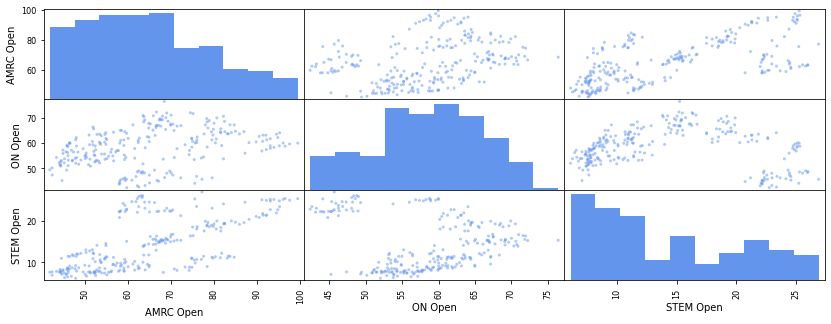

In [35]:
# plot the scatter matrix. These help to determine if there is a linear correlation with 1 or more variables

pd.plotting.scatter_matrix(combined_df, figsize=(14,5), color='cornflowerblue', hist_kwds={'color':['cornflowerblue']})

# can't assume relationship from this matrix as energy producers)

array([[<AxesSubplot:xlabel='AMRC Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='AMRC Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='ON Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='STEM Open'>]],
      dtype=object)

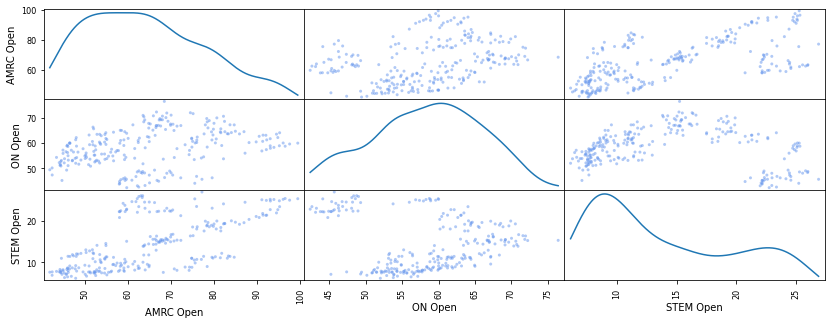

In [36]:
# Scatter Matrix on 'Open' Data with density plot integrated (KDE)

pd.plotting.scatter_matrix(combined_df, diagonal='kde', figsize=(14,5), color='cornflowerblue')

In [37]:
# Daily percentage change to measure volatility (distribution). DPC is the change in value of a 
# stock over a single trading day.

# rt = Pt/Pt-1 -1  (roi)

In [38]:
# Daily percentage change formula
amrc['Daily Percentage Change'] = (amrc['Close']/amrc['Close'].shift(1)) - 1


amrc.head()

High        Low       Open      Close  Volume  Adj Close  \
Date                                                                        
2021-09-13  70.379997  67.699997  70.379997  68.230003  333900  68.230003   
2021-09-14  70.800003  68.970001  69.010002  70.300003  399800  70.300003   
2021-09-15  70.580002  69.080002  70.000000  70.010002  476700  70.010002   
2021-09-16  70.599998  65.589996  69.680000  65.599998  439400  65.599998   
2021-09-17  67.669998  65.309998  66.169998  66.489998  868100  66.489998   

            Total Traded  MA50  MA100  Daily Percentage Change  
Date                                                            
2021-09-13  2.349988e+07   NaN    NaN                      NaN  
2021-09-14  2.759020e+07   NaN    NaN                 0.030339  
2021-09-15  3.336900e+07   NaN    NaN                -0.004125  
2021-09-16  3.061739e+07   NaN    NaN                -0.062991  
2021-09-17  5.744218e+07   NaN    NaN                 0.013567

<AxesSubplot:>

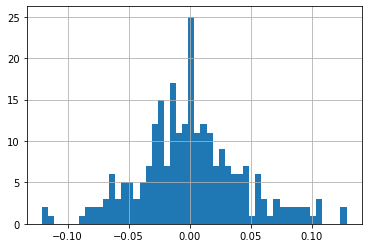

In [39]:
# Histogram to convert above table info into a more understandable format
# higher the std dev, the higher the variance is (more volatility)
# larger width = more variants

amrc['Daily Percentage Change'].hist(bins=50)

In [40]:
on['Daily Percentage Change'] = (on['Close']/on['Close'].shift(1)) - 1
on

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2021-09-13  47.750000  46.580002  47.330002  47.639999  5018200  47.639999   
2021-09-14  48.459999  47.270000  48.049999  47.849998  5553200  47.849998   
2021-09-15  49.230000  47.570000  48.240002  49.209999  5534000  49.209999   
2021-09-16  49.709999  48.380001  48.930000  49.400002  5785300  49.400002   
2021-09-17  49.400002  48.090000  49.290001  48.889999  7268000  48.889999   
...               ...        ...        ...        ...      ...        ...   
2022-09-07  67.889999  65.639999  66.099998  67.360001  5836500  67.360001   
2022-09-08  70.610001  66.389999  66.660004  70.550003  9769200  70.550003   
2022-09-09  72.919998  71.019997  71.589996  71.669998  8264300  71.669998   
2022-09-12  72.330002  70.669998  71.949997  71.900002  5592400  71.900002   
2022-09-13  69.080002  66.570000  68.589996  66.870003  9889000  66.870003   

            Total Traded     MA50    MA100  Daily Percentage Change  
Date                                                                 
2021-09-13  1.580349e+07      NaN      NaN                      NaN  
2021-09-14  1.921039e+07      NaN      NaN                 0.004408  
2021-09-15  2.299601e+07      NaN      NaN                 0.028422  
2021-09-16  2.149984e+07      NaN      NaN                 0.003861  
2021-09-17  4.278865e+07      NaN      NaN                -0.010324  
...                  ...      ...      ...                      ...  
2022-09-07  2.551460e+07  62.7196  55.4184                 0.019833  
2022-09-08  2.503083e+07  63.0744  55.5926                 0.047358  
2022-09-09  2.338129e+07  63.4854  55.7750                 0.015875  
2022-09-12  2.728344e+07  63.9172  55.9409                 0.003209  
2022-09-13  1.661250e+07  64.3178  56.1021                -0.069958  

[253 rows x 10 columns]

In [41]:
stem['Daily Percentage Change'] = (stem['Close']/stem['Close'].shift(1)) - 1
stem

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2021-09-13  23.340000  22.250000  22.540001  22.920000  2683900  22.920000   
2021-09-14  23.080000  22.155001  22.950001  22.360001  2031600  22.360001   
2021-09-15  22.459999  21.740000  22.250000  22.360001  2374000  22.360001   
2021-09-16  23.885000  22.045000  22.299999  23.740000  2398100  23.740000   
2021-09-17  25.980000  24.090000  24.309999  25.940001  8552600  25.940001   
...               ...        ...        ...        ...      ...        ...   
2022-09-07  15.650000  14.290000  14.340000  15.630000  7655100  15.630000   
2022-09-08  16.280001  15.130000  15.310000  16.160000  5694800  16.160000   
2022-09-09  16.711000  16.010000  16.370001  16.400000  3959500  16.400000   
2022-09-12  16.590000  15.630000  16.299999  16.559999  4214700  16.559999   
2022-09-13  16.830000  15.180000  15.340000  16.350000  4173000  16.350000   

            Total Traded  Daily Percentage Change  
Date                                               
2021-09-13  7.526106e+06                      NaN  
2021-09-14  9.175410e+06                -0.024433  
2021-09-15  1.060658e+07                 0.000000  
2021-09-16  9.798620e+06                 0.061717  
2021-09-17  2.110351e+07                 0.092671  
...                  ...                      ...  
2022-09-07  5.535240e+06                 0.107725  
2022-09-08  5.748905e+06                 0.033909  
2022-09-09  5.346442e+06                 0.014851  
2022-09-12  6.180960e+06                 0.009756  
2022-09-13  3.715348e+06                -0.012681  

[253 rows x 8 columns]

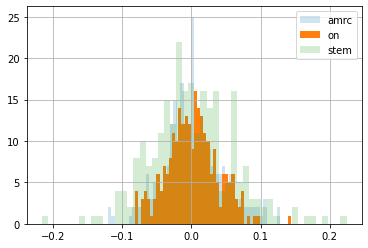

In [42]:
# combine these on same graph
amrc['Daily Percentage Change'].hist(bins=50, label='amrc', alpha=0.2)
on['Daily Percentage Change'].hist(bins=50, label='on')
stem['Daily Percentage Change'].hist(bins=50, label='stem', alpha=0.2)
plt.legend()

In [43]:
# Create table with all three stocks for daily percentaqe change only, integrating pct_change() and a for-loop. 
# Yfinance ia utilized to pull stocks directly by Ticker

stocks =['AMRC','ON','STEM']
stock_list = []
for stock in stocks:
    returns = yf.Ticker(stock)
    returns = returns.history(period="1y")
    returns['returns'] =  returns['Close'].pct_change()
    returns.rename(columns={'returns': stock}, inplace=True)
    returns = returns[stock]
    stock_list.append(returns)
    green_stock_returns =pd.DataFrame(stock_list).T
green_stock_returns

AMRC        ON      STEM
Date                                    
2021-09-21       NaN       NaN       NaN
2021-09-22  0.008008  0.019295  0.019826
2021-09-23  0.000953  0.015638  0.012830
2021-09-24 -0.008095 -0.001418 -0.028791
2021-09-27  0.023524  0.003855  0.037945
...              ...       ...       ...
2022-09-14  0.055440  0.025422  0.065443
2022-09-15 -0.034582 -0.006125 -0.025258
2022-09-16 -0.007191  0.011592 -0.031802
2022-09-19 -0.014213  0.017697  0.018248
2022-09-20 -0.050603 -0.023945 -0.041219

[252 rows x 3 columns]

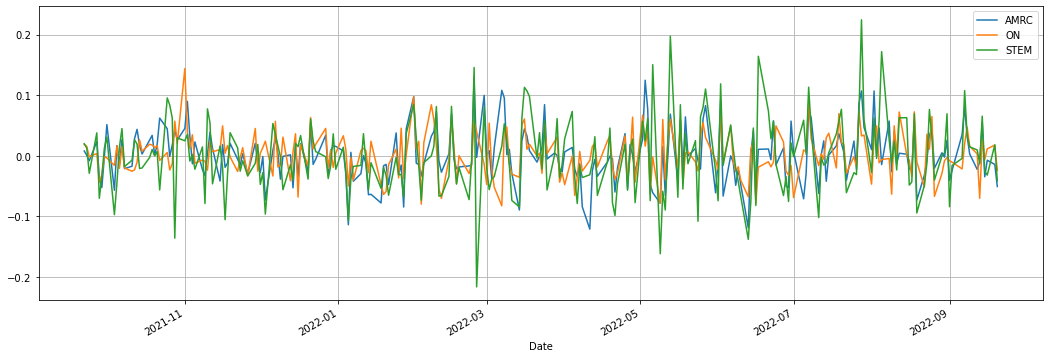

In [44]:
# Daily percentage change - line graph

green_stock_returns.plot(figsize=(18,6))
plt.grid(True)

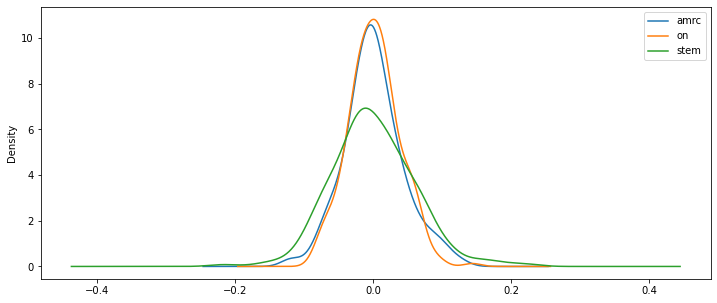

In [45]:
# Compare previous graph with a diagram down integrating KDE (kernel density estimate)
# KDE is normalized, histogram is not. Comparison of the two can be used for verification.

amrc['Daily Percentage Change'].plot(kind='kde', label='amrc', figsize=(12,5))
on['Daily Percentage Change'].plot(kind='kde', label='on')
stem['Daily Percentage Change'].plot(kind='kde',label='stem')
plt.legend()

<AxesSubplot:>

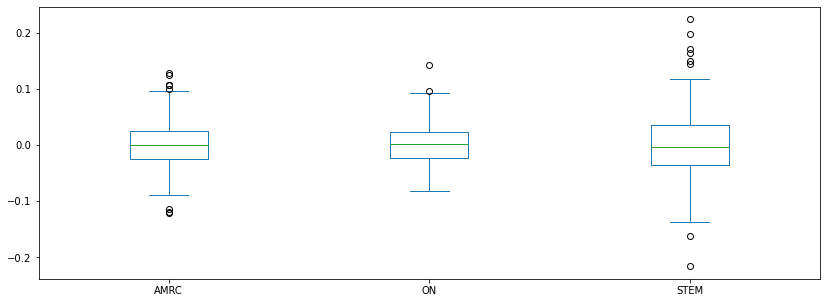

In [46]:
# Box Plot

boxplot_df = pd.concat([amrc['Daily Percentage Change'], on['Daily Percentage Change'], stem['Daily Percentage Change']], axis=1)
boxplot_df.columns = ['AMRC','ON','STEM']
boxplot_df.plot(kind='box', figsize=(14,5))

# stem is the most volatile

In [47]:
# Cumulative Return. Total change in the investment price over a set time.

# it = (1+rt)it-1

amrc['Cumulative Return'] = (1 + amrc['Daily Percentage Change']).cumprod() - 1 
amrc


High        Low       Open      Close  Volume  Adj Close  \
Date                                                                        
2021-09-13  70.379997  67.699997  70.379997  68.230003  333900  68.230003   
2021-09-14  70.800003  68.970001  69.010002  70.300003  399800  70.300003   
2021-09-15  70.580002  69.080002  70.000000  70.010002  476700  70.010002   
2021-09-16  70.599998  65.589996  69.680000  65.599998  439400  65.599998   
2021-09-17  67.669998  65.309998  66.169998  66.489998  868100  66.489998   
...               ...        ...        ...        ...     ...        ...   
2022-09-07  72.320000  65.860001  66.500000  72.160004  386000  72.160004   
2022-09-08  74.669998  71.050003  71.379997  74.500000  375500  74.500000   
2022-09-09  76.260002  74.339996  75.110001  74.739998  326600  74.739998   
2022-09-12  74.980003  69.470001  74.480003  73.070000  379200  73.070000   
2022-09-13  73.379997  69.010002  69.290001  72.330002  242200  72.330002   

            Total Traded       MA50    MA100  Daily Percentage Change  \
Date                                                                    
2021-09-13  2.349988e+07        NaN      NaN                      NaN   
2021-09-14  2.759020e+07        NaN      NaN                 0.030339   
2021-09-15  3.336900e+07        NaN      NaN                -0.004125   
2021-09-16  3.061739e+07        NaN      NaN                -0.062991   
2021-09-17  5.744218e+07        NaN      NaN                 0.013567   
...                  ...        ...      ...                      ...   
2022-09-07  2.566900e+07  57.409401  55.4184                 0.081211   
2022-09-08  2.680319e+07  57.990001  55.5926                 0.032428   
2022-09-09  2.453093e+07  58.623000  55.7750                 0.003221   
2022-09-12  2.824282e+07  59.173200  55.9409                -0.022344   
2022-09-13  1.678204e+07  59.702401  56.1021                -0.010127   

            Cumulative Return  
Date                           
2021-09-13                NaN  
2021-09-14           0.030339  
2021-09-15           0.026088  
2021-09-16          -0.038546  
2021-09-17          -0.025502  
...                       ...  
2022-09-07           0.057599  
2022-09-08           0.091895  
2022-09-09           0.095412  
2022-09-12           0.070936  
2022-09-13           0.060091  

[253 rows x 11 columns]

In [48]:
on['Cumulative Return'] = (1 + on['Daily Percentage Change']).cumprod() - 1 
on

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2021-09-13  47.750000  46.580002  47.330002  47.639999  5018200  47.639999   
2021-09-14  48.459999  47.270000  48.049999  47.849998  5553200  47.849998   
2021-09-15  49.230000  47.570000  48.240002  49.209999  5534000  49.209999   
2021-09-16  49.709999  48.380001  48.930000  49.400002  5785300  49.400002   
2021-09-17  49.400002  48.090000  49.290001  48.889999  7268000  48.889999   
...               ...        ...        ...        ...      ...        ...   
2022-09-07  67.889999  65.639999  66.099998  67.360001  5836500  67.360001   
2022-09-08  70.610001  66.389999  66.660004  70.550003  9769200  70.550003   
2022-09-09  72.919998  71.019997  71.589996  71.669998  8264300  71.669998   
2022-09-12  72.330002  70.669998  71.949997  71.900002  5592400  71.900002   
2022-09-13  69.080002  66.570000  68.589996  66.870003  9889000  66.870003   

            Total Traded     MA50    MA100  Daily Percentage Change  \
Date                                                                  
2021-09-13  1.580349e+07      NaN      NaN                      NaN   
2021-09-14  1.921039e+07      NaN      NaN                 0.004408   
2021-09-15  2.299601e+07      NaN      NaN                 0.028422   
2021-09-16  2.149984e+07      NaN      NaN                 0.003861   
2021-09-17  4.278865e+07      NaN      NaN                -0.010324   
...                  ...      ...      ...                      ...   
2022-09-07  2.551460e+07  62.7196  55.4184                 0.019833   
2022-09-08  2.503083e+07  63.0744  55.5926                 0.047358   
2022-09-09  2.338129e+07  63.4854  55.7750                 0.015875   
2022-09-12  2.728344e+07  63.9172  55.9409                 0.003209   
2022-09-13  1.661250e+07  64.3178  56.1021                -0.069958   

            Cumulative Return  
Date                           
2021-09-13                NaN  
2021-09-14           0.004408  
2021-09-15           0.032955  
2021-09-16           0.036944  
2021-09-17           0.026238  
...                       ...  
2022-09-07           0.413938  
2022-09-08           0.480898  
2022-09-09           0.504408  
2022-09-12           0.509236  
2022-09-13           0.403652  

[253 rows x 11 columns]

In [49]:
stem['Cumulative Return'] = (1 + stem['Daily Percentage Change']).cumprod() - 1 
stem

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2021-09-13  23.340000  22.250000  22.540001  22.920000  2683900  22.920000   
2021-09-14  23.080000  22.155001  22.950001  22.360001  2031600  22.360001   
2021-09-15  22.459999  21.740000  22.250000  22.360001  2374000  22.360001   
2021-09-16  23.885000  22.045000  22.299999  23.740000  2398100  23.740000   
2021-09-17  25.980000  24.090000  24.309999  25.940001  8552600  25.940001   
...               ...        ...        ...        ...      ...        ...   
2022-09-07  15.650000  14.290000  14.340000  15.630000  7655100  15.630000   
2022-09-08  16.280001  15.130000  15.310000  16.160000  5694800  16.160000   
2022-09-09  16.711000  16.010000  16.370001  16.400000  3959500  16.400000   
2022-09-12  16.590000  15.630000  16.299999  16.559999  4214700  16.559999   
2022-09-13  16.830000  15.180000  15.340000  16.350000  4173000  16.350000   

            Total Traded  Daily Percentage Change  Cumulative Return  
Date                                                                  
2021-09-13  7.526106e+06                      NaN                NaN  
2021-09-14  9.175410e+06                -0.024433          -0.024433  
2021-09-15  1.060658e+07                 0.000000          -0.024433  
2021-09-16  9.798620e+06                 0.061717           0.035777  
2021-09-17  2.110351e+07                 0.092671           0.131763  
...                  ...                      ...                ...  
2022-09-07  5.535240e+06                 0.107725          -0.318063  
2022-09-08  5.748905e+06                 0.033909          -0.294939  
2022-09-09  5.346442e+06                 0.014851          -0.284468  
2022-09-12  6.180960e+06                 0.009756          -0.277487  
2022-09-13  3.715348e+06                -0.012681          -0.286649  

[253 rows x 9 columns]

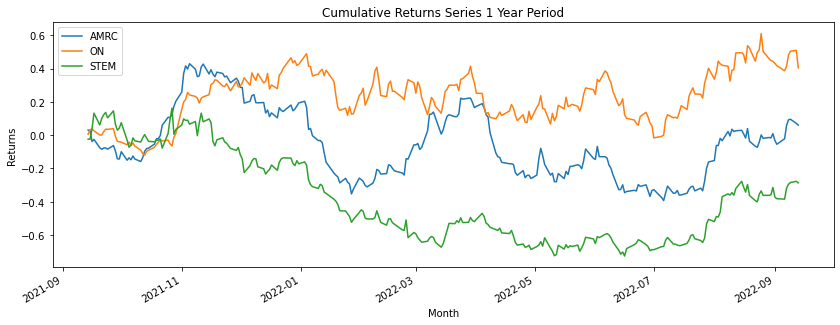

In [50]:
# Plot cumulative returns on all three stocks
amrc['Cumulative Return'].plot(label='AMRC', figsize=(14,5))
on['Cumulative Return'].plot(label='ON')
stem['Cumulative Return'].plot(label='STEM')
plt.title('Cumulative Returns Series 1 Year Period')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.legend()

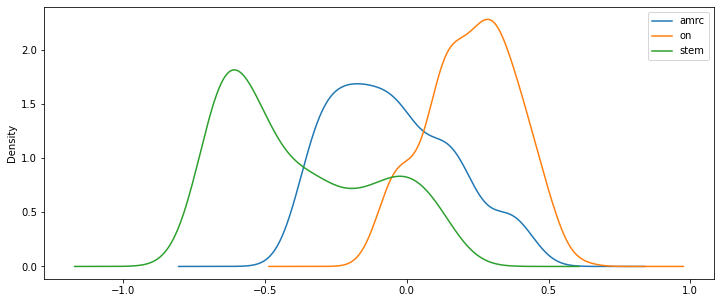

In [51]:
# KDE on cumulative returns

amrc['Cumulative Return'].plot(kind='kde', label='amrc', figsize=(12,5))
on['Cumulative Return'].plot(kind='kde', label='on')
stem['Cumulative Return'].plot(kind='kde',label='stem')
plt.legend()

In [52]:
# From medium

#Cloudflare
stem_table = yf.Ticker("stem")
stem_table

# Set the timeframe you are interested in viewing.
net_historical = stem_table.history(start="2018-01-2", end="2020-12-11", interval="1d")
# Create a new DataFrame called signals, keeping only the 'Date' & 'Close' columns.
net_historical.head()

Open   High   Low  Close  Volume  Dividends  Stock Splits
Date                                                                  
2020-10-08  10.00  10.00  9.67  9.700   27400          0             0
2020-10-09   9.67   9.80  9.67  9.760  210000          0             0
2020-10-12   9.85   9.85  9.69  9.700   19600          0             0
2020-10-13   9.71   9.83  9.65  9.750   19800          0             0
2020-10-14   9.80   9.80  9.68  9.762    1200          0             0

In [53]:
indicator_df = net_historical.drop(columns=['Open', 'High', 'Low', 'Volume','Dividends', 'Stock Splits'])
# Set the timeframe you are interested in viewing.
# Create a new DataFrame called signals, keeping only the 'Date' & 'Close' columns.
indicator_df.head()

Close
Date             
2020-10-08  9.700
2020-10-09  9.760
2020-10-12  9.700
2020-10-13  9.750
2020-10-14  9.762